In [259]:
# Import libraries

import pandas as pd
import numpy as np
import scipy as sp
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime
from __future__ import division, print_function, unicode_literals


# Data Prep

In [260]:
#Import dataset: "products.csv"
products = pd.read_csv("products.csv")

products.head()

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,20000002.0,ACSE SS TUNA LT CHUNK IN BROTH,Grocery,Canned,Canned Fish/Meat,Canned Tuna,ACSE,1.0,KG,1.88
1,20000005.0,ACSE APPLE CIDER 3 LT,Produce,Hard Goods,Dressing/Dips/Juices,Juice,ACSE,1.0,L,3.00
2,20000069.0,ACSE WHOLE COD,Seafood,Fresh Seafood,Fresh Fish,Cod,ACSE,1.0,KG,1.00
3,20000086.0,S.S. SR. JUICE BERRIES,Bulk,Bulk Foods,Confectionary,Candy,SANB,1.0,UN,1.00
4,20000093.0,DANONE ACTIVIA CLUB PACK,Dairy,Yogurt/Refrigerated Juice,Yogurt,Health,DACT,24.0,G,100.00


In [261]:
products.shape  #155919 rows, 10 columns

(155919, 10)

In [262]:
products.dtypes #check data type for each column

prod_id                float64
prod_desc               object
prod_section            object
prod_category           object
prod_subcategory        object
prod_type               object
prod_mfc_brand_cd       object
prod_unit_qty_count    float64
prod_count_uom          object
prod_uom_value         float64
dtype: object

In [263]:
products.isna().sum()

prod_id                1101
prod_desc              1101
prod_section           1101
prod_category          1101
prod_subcategory       1101
prod_type              3341
prod_mfc_brand_cd      1101
prod_unit_qty_count    1101
prod_count_uom         1101
prod_uom_value         1101
dtype: int64

In [264]:
products = products.dropna()

In [265]:
products.shape #3000+ rows dropped

(152578, 10)

Transactions Table

In [266]:
transactions = pd.read_csv("transactions_sampled_v5.csv")

transactions.head()

,Unnamed: 0,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt
0,333895,170625010050404567,6/25/2017,1005,1008061498,21031312,2.49,1,0.0
1,762901,170624010220809847,6/24/2017,1022,1133995672,20189092,0.05,1,0.0
2,352577,170624010100701456,6/24/2017,1010,60003034881280,20708931,11.99,1,0.0
3,236852,170624010210702469,6/24/2017,1021,1008762288,20169567,9.00,1,0.2
4,760527,170624010660808197,6/24/2017,1066,1148460508,20314333,34.38,3,0.0


In [269]:
transactions.shape 


(12061594, 9)

In [270]:
(transactions['sales_amt'] < 0).any() #check if there is negative sales amount

True

In [271]:
(transactions['sales_qty'] < 0).any() #check if there is negative sales quantity/unit

True

In [272]:
#Negative sales amount and quantity don't make sense, filter out those rows
transactions.drop(transactions[transactions['sales_amt'] < 0].index, inplace = True)
transactions.drop(transactions[transactions['sales_qty'] < 0].index, inplace = True)
transactions.shape

(11907126, 9)

In [273]:
transactions.dtypes

Unnamed: 0      int64
trans_id        int64
trans_dt       object
store_id        int64
cust_id         int64
prod_id         int64
sales_amt     float64
sales_qty       int64
sales_wgt     float64
dtype: object

In [274]:
transactions.isna().sum()

Unnamed: 0    0
trans_id      0
trans_dt      0
store_id      0
cust_id       0
prod_id       0
sales_amt     0
sales_qty     0
sales_wgt     0
dtype: int64

In [275]:
transactions = transactions.dropna()

In [276]:
transactions.shape 

(11907126, 9)

Merge the two tables to further explore and answer business questions
How:Merge on "prod_id"

In [277]:
merged = transactions.merge(products, how="inner", on="prod_id")

merged.head()

,Unnamed: 0,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,333895,170625010050404567,6/25/2017,1005,1008061498,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
1,522825,170624010190805778,6/24/2017,1019,1100611737,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
2,481242,170624010010806725,6/24/2017,1001,1016601259,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
3,254888,170624010270807847,6/24/2017,1027,1021650510,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
4,640917,170625010040707767,6/25/2017,1004,1128987709,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0


In [278]:
# merged = merged.iloc[:,1:]
# dropping the first column "Unnamed:0"
merged = merged.drop(labels='Unnamed: 0', axis=1)
merged.head()

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,170625010050404567,6/25/2017,1005,1008061498,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
1,170624010190805778,6/24/2017,1019,1100611737,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
2,170624010010806725,6/24/2017,1001,1016601259,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
3,170624010270807847,6/24/2017,1027,1021650510,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0
4,170625010040707767,6/25/2017,1004,1128987709,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,QUPA,1.0,G,300.0


In [279]:
# merged.loc[merged['prod_id'] == 20297499.0, ['sales_amt', 'sales_qty']]
# so the sales_amt is the total amount paid for the transaction.

In [280]:
merged.shape

(11758644, 17)

In [281]:
merged.isna().sum()

trans_id               0
trans_dt               0
store_id               0
cust_id                0
prod_id                0
sales_amt              0
sales_qty              0
sales_wgt              0
prod_desc              0
prod_section           0
prod_category          0
prod_subcategory       0
prod_type              0
prod_mfc_brand_cd      0
prod_unit_qty_count    0
prod_count_uom         0
prod_uom_value         0
dtype: int64

# Business Questions

### Question 1. 
Who are the best customers in terms of revenues, profits, transactions/store visits, number of products, etc.?

In [290]:
#revenues/profits : who are the customers corresponding to highest sales_amt
merged.groupby('cust_id').sales_amt.sum().sort_values(ascending=False)

cust_id
1153341792     5254.17
1135252713     4990.87
1127597307     4956.39
1147458804     4137.68
1143554806     3767.19
                ...   
1077156416        0.00
1006903073        0.00
33261345754       0.00
33257211931       0.00
1146877973        0.00
Name: sales_amt, Length: 2538690, dtype: float64

In [291]:
#transactions/store visit: who are the customers with highest number of transactions?
merged.groupby('cust_id').trans_id.count().sort_values(ascending=False)
#one cust can have multiple transactions(but the same cust has unique cust id), 
#here we want to calculating the count of transaction id with descending order

cust_id
1135252713        893
1147458804        771
1143554806        636
1130048984        439
1127306013        390
                 ... 
1152031000          1
1152030759          1
1152030690          1
1152030597          1
60003136139480      1
Name: trans_id, Length: 2538690, dtype: int64

In [292]:
merged.groupby('cust_id').store_id.count().sort_values(ascending=False)
#same result

cust_id
1135252713        893
1147458804        771
1143554806        636
1130048984        439
1127306013        390
                 ... 
1152031000          1
1152030759          1
1152030690          1
1152030597          1
60003136139480      1
Name: store_id, Length: 2538690, dtype: int64

In [293]:
#number of products:
# Customers that bought the most number of unique products

merged.groupby('cust_id')['prod_id'].nunique().sort_values(ascending=False)

cust_id
1135252713        744
1147458804        638
1143554806        533
1130048984        370
1127306013        348
                 ... 
1151908598          1
1151908449          1
1151908268          1
1151908250          1
60003136139480      1
Name: prod_id, Length: 2538690, dtype: int64

In [294]:
#Customers that bought the most number of products (do not have to be unique)
merged.groupby('cust_id').prod_id.count().sort_values(ascending=False)

cust_id
1135252713        893
1147458804        771
1143554806        636
1130048984        439
1127306013        390
                 ... 
1152031000          1
1152030759          1
1152030690          1
1152030597          1
60003136139480      1
Name: prod_id, Length: 2538690, dtype: int64

### Question 2. 
What are the products and product groups with the best volumes, revenues, profits, transactions, customers, etc.?

In [295]:
#products with highest revenue/profit
merged.groupby('prod_id').sales_amt.sum().sort_values(ascending=False)

prod_id
20175355001    274230.00
20027156       255373.90
20425775001    204238.98
20252014       194321.92
20821992       176474.02
                 ...    
20964399            0.00
20431737            0.00
20669821            0.00
20909605            0.00
21065706            0.00
Name: sales_amt, Length: 93271, dtype: float64

In [296]:
#products with highest transactions (not unique)
merged.groupby('prod_id').trans_id.count().sort_values(ascending=False)

prod_id
20189092       414875
20175355001    188493
20070132001     58794
20812144001     47993
21097012001     42393
                ...  
21211144            1
21211113            1
21211103            1
20896394            1
21057509            1
Name: trans_id, Length: 93271, dtype: int64

In [297]:
#products with highest UNIQUE transaction
merged.drop_duplicates(['trans_id', 'cust_id']).groupby('prod_id')['trans_id'].count().sort_values(ascending=False)

prod_id
20189092       414874
20175355001    187130
20070132001     58521
20812144001     47255
20145621001     40483
                ...  
21096981            1
20139446004         1
20417054            1
20157510            1
21051703            1
Name: trans_id, Length: 91086, dtype: int64

### Question 3. 
Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?

In [298]:
#stores with highest revenues/profit
merged.groupby('store_id').sales_amt.sum().sort_values(ascending=False)

store_id
1212    2675844.14
1050    2464376.93
1004    2307552.72
1007    2287509.86
1066    2237201.63
1021    2133418.45
1035    2057083.62
1011    1882242.48
1027    1859250.05
1040    1807083.22
1188    1751962.57
1016    1704509.69
1019    1635009.15
1051    1597033.05
1114    1583250.10
1001    1577339.09
1028    1539080.94
1194    1500092.86
1014    1498331.44
1079    1497531.42
1099    1487976.29
1029    1448639.00
1032    1405422.68
1005    1384601.16
1083    1377363.17
1010    1352160.08
1000    1324403.93
1127    1281151.98
1092    1279249.16
1022    1222848.72
1090    1145485.31
1095    1079456.53
1003    1075788.65
1170    1062037.01
1155     937594.38
1064     916251.02
1082     858166.69
1020     796611.34
1132     728584.78
1208     650949.34
1154     640711.25
1174     632221.87
1023     616004.58
1200     538544.95
1179     493150.52
1142     382755.41
1424      84735.01
1221       2481.46
1211       1649.21
1210       1630.52
1222       1461.46
1217       1455.84
122

In [299]:
#stores with highest transactions
merged.groupby('store_id').trans_id.count().sort_values(ascending=False)

store_id
1212    489875
1007    452125
1050    445353
1004    413001
1066    396121
1021    370009
1035    365963
1027    341037
1040    337187
1011    327956
1188    319490
1016    312723
1019    302143
1051    296643
1114    289974
1001    280824
1014    276240
1000    273330
1079    272336
1010    267774
1194    266724
1029    264509
1099    264198
1028    261184
1083    252441
1005    246643
1032    241226
1170    229138
1127    228988
1092    223562
1022    223003
1095    220521
1090    199939
1003    188152
1020    171438
1155    170833
1064    169949
1082    161566
1132    145334
1154    125732
1174    125197
1023    119161
1208    116434
1200    107687
1179    103774
1142     83772
1424     16149
1221       189
1210       140
1211       124
1222       124
1227       119
1217       118
1213       112
1231       104
1220       103
1214        89
1223        64
Name: trans_id, dtype: int64

In [300]:
#stores with highest UNIQUE transactions
merged.drop_duplicates(['trans_id', 'cust_id']).groupby('store_id')['trans_id'].count().sort_values(ascending=False)

store_id
1212    444551
1007    422641
1050    407451
1004    371172
1066    359791
1035    331364
1021    330864
1027    309917
1040    309577
1011    298944
1188    289607
1016    284518
1019    279381
1051    271238
1114    264740
1000    255580
1001    254055
1010    253621
1014    252960
1079    247356
1029    240708
1028    239926
1194    239300
1099    237136
1083    229891
1005    222621
1032    220774
1170    213835
1127    208163
1095    204127
1022    203731
1092    196882
1090    181462
1003    172565
1020    162246
1155    156487
1064    154621
1082    147908
1132    136235
1174    116444
1154    115427
1023    109691
1208    107612
1200    101021
1179     97696
1142     80765
1424     15120
1221       188
1210       139
1222       124
1211       123
1227       119
1217       118
1213       111
1231       104
1220       103
1214        88
1223        64
Name: trans_id, dtype: int64

In [301]:
#stores with highst number of customers
merged.groupby('store_id').cust_id.count().sort_values(ascending=False)

store_id
1212    489875
1007    452125
1050    445353
1004    413001
1066    396121
1021    370009
1035    365963
1027    341037
1040    337187
1011    327956
1188    319490
1016    312723
1019    302143
1051    296643
1114    289974
1001    280824
1014    276240
1000    273330
1079    272336
1010    267774
1194    266724
1029    264509
1099    264198
1028    261184
1083    252441
1005    246643
1032    241226
1170    229138
1127    228988
1092    223562
1022    223003
1095    220521
1090    199939
1003    188152
1020    171438
1155    170833
1064    169949
1082    161566
1132    145334
1154    125732
1174    125197
1023    119161
1208    116434
1200    107687
1179    103774
1142     83772
1424     16149
1221       189
1210       140
1211       124
1222       124
1227       119
1217       118
1213       112
1231       104
1220       103
1214        89
1223        64
Name: cust_id, dtype: int64

### Question 4 
Are there interesting groupings of customers, e.g., most valuable (buy everything at any price) or cherry-pickers (buy mostly on promotions), defined by certain categories (buy baby products or never buy milk), etc.?

In [302]:
#calculate the discount rate of each product
merged['unit_price'] = merged['sales_amt']/merged['sales_qty']
merged['unit_price'].sort_values()

357540      0.0
381532      0.0
363201      0.0
381531      0.0
363202      0.0
           ... 
11124491    NaN
11124569    NaN
11272333    NaN
11564161    NaN
11737319    NaN
Name: unit_price, Length: 11758644, dtype: float64

In [303]:
merged['max_price'] = merged.groupby(['prod_id'])['unit_price'].transform('max')
merged['discount_rate'] =  round((merged['max_price']-merged['unit_price'])/merged['max_price'],4)*100
merged['discount_rate'].sort_values(ascending = True)

11758643    0.0
8094717     0.0
8094716     0.0
8094715     0.0
8094709     0.0
           ... 
11712565    NaN
11712566    NaN
11712567    NaN
11737319    NaN
11755087    NaN
Name: discount_rate, Length: 11758644, dtype: float64

In [304]:
#calculate frequency of customer (total purchase times)
merged['frequency'] = merged.groupby(['cust_id'])['trans_id'].transform(lambda x: x.nunique())
merged['frequency'].sort_values(ascending = True)
#merged.head()

3204776       1
1352641       1
1352640       1
8328750       1
1352638       1
           ... 
8216935     800
1995398     800
10893364    800
5364923     800
11397350    800
Name: frequency, Length: 11758644, dtype: int64

In [305]:
from datetime import datetime

dmax = datetime.strptime(merged['trans_dt'].max() , "%m/%d/%Y")
dmin =  datetime.strptime(merged['trans_dt'].min(), "%m/%d/%Y")
interval =  abs((dmax - dmin).days)
interval

982

In [385]:
merged['trans_dt'].max()

Timestamp('2020-12-25 00:00:00')

In [386]:
merged['last_shopping'] = merged.groupby(['cust_id'])['trans_dt'].transform('max')

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/824272883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['last_shopping'] = merged.groupby(['cust_id'])['trans_dt'].transform('max')


In [387]:
merged['last_shopping']

0          2018-08-19
1          2017-06-24
2          2018-02-03
3          2017-11-02
4          2020-10-31
              ...    
11758639   2020-12-24
11758640   2020-12-24
11758641   2020-12-24
11758642   2020-12-24
11758643   2020-12-23
Name: last_shopping, Length: 11572350, dtype: datetime64[ns]

In [388]:
merged['last_shopping'] = pd.to_datetime(merged['last_shopping'])

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/2573927441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['last_shopping'] = pd.to_datetime(merged['last_shopping'])


In [389]:
#calculate recency of customer (average time interval between two perchase)
merged['recency'] = abs(pd.to_datetime(dmax) - merged['last_shopping'])
merged['recency'] = (merged['recency']/ np.timedelta64(1, 'D')).astype(int)

merged['recency'].sort_values(ascending = True)

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/113985253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['recency'] = abs(pd.to_datetime(dmax) - merged['last_shopping'])
C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/113985253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['recency'] = (merged['recency']/ np.timedelta64(1, 'D')).astype(int)


1509918        0
6281360        0
1345547        0
3286952        0
10501513       0
            ... 
5104768     1173
8360910     1173
4940664     1173
1500263     1173
4696007     1173
Name: recency, Length: 11572350, dtype: int32

In [390]:
#calculate monetary of customer (average money spent for each purchase)

merged['monetary'] = merged.groupby(['cust_id','trans_id'])['sales_amt'].transform('mean')
merged['monetary'].sort_values(ascending = True)


C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/3073168723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['monetary'] = merged.groupby(['cust_id','trans_id'])['sales_amt'].transform('mean')


370287         0.00
363340         0.00
363343         0.00
363344         0.00
363345         0.00
             ...   
11663965    1397.20
8961434     1399.30
2225150     2086.00
10748495    4954.23
8961406     4956.39
Name: monetary, Length: 11572350, dtype: float64

In [391]:
# Calculate the average discount rate for each customer
merged['avg_discount'] = merged.groupby(['cust_id'])['discount_rate'].transform('mean')
merged['avg_discount'].sort_values(ascending = True)

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/1957128140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['avg_discount'] = merged.groupby(['cust_id'])['discount_rate'].transform('mean')


7070954       0.0
10914282      0.0
10914280      0.0
10914273      0.0
10914271      0.0
            ...  
370802      100.0
357698      100.0
357711      100.0
370823      100.0
376261      100.0
Name: avg_discount, Length: 11572350, dtype: float64

In [392]:
merged['prod_category'].nunique()

85

In [393]:
merged['prod_section'].nunique()

28

In [394]:
cus = merged[['cust_id','avg_discount','frequency','recency','monetary']]

cus.drop_duplicates('cust_id','first',inplace = True)

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/2755216691.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only
  cus.drop_duplicates('cust_id','first',inplace = True)
C:\Users\sendt\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [395]:
X = cus.iloc[:,1:]
X.head()

,avg_discount,frequency,recency,monetary
0,44.439231,10,752,2.490
1,50.100000,1,1173,2.490
2,29.225000,2,949,2.490
3,56.963333,2,1042,1.995
4,30.850500,18,52,3.740


In [396]:
#build kmeans model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X.values)
features = scaler.transform(X.values)

Text(0, 0.5, 'Inertia')

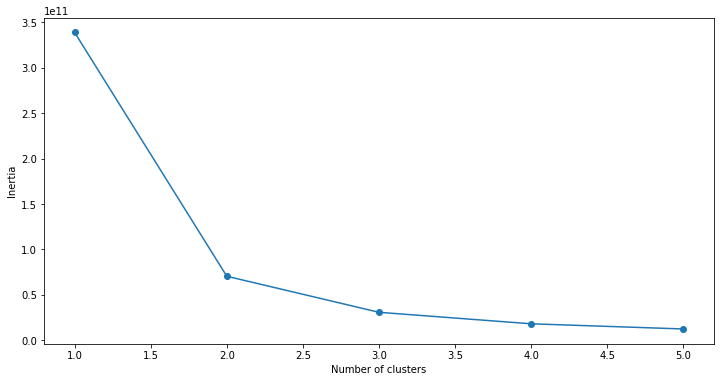

In [397]:
SSE = []

for cluster in range(1,6):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,6), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [398]:
#According to elbow rule, there is 3 clusters
cus_cluster = KMeans(3).fit_predict(X)

cus['cluster'] = cus_cluster


C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/199753168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus['cluster'] = cus_cluster


In [399]:
cus.groupby(['cluster'])['avg_discount','frequency','recency','monetary'].agg('mean')


#group 0： high value customer, not sensitive to price and discount
#group 1: frequent customer, spending middle amount of money
#group 2: cherry-pickers, spending least amount of money

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/3231502267.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cus.groupby(['cluster'])['avg_discount','frequency','recency','monetary'].agg('mean')


,avg_discount,frequency,recency,monetary
cluster,,,,
0,36.765840,1.520278,954.683370,5.055955
1,32.306475,6.774645,111.519923,4.410464
2,34.709507,2.405530,514.941711,4.924810


In [400]:
cus.groupby(['cluster'])['cust_id'].agg('nunique')

cluster
0     659167
1    1204056
2     653247
Name: cust_id, dtype: int64

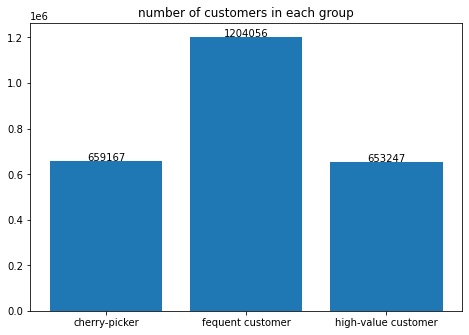

In [401]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


heights = cus.groupby(['cluster'])['cust_id'].agg('nunique')
customer = ["cherry-picker","fequent customer","high-value customer"]
ax.bar(customer,height = heights)
addlabels(customer,heights)
plt.title("number of customers in each group")
plt.show()

In [404]:
cust_cluster = cus[['cust_id','cluster']]

In [405]:
merged1 = merged.merge(cust_cluster, how="inner", on="cust_id")

In [406]:
merged1.groupby(['cluster'])['sales_amt'].agg('sum')

cluster
0     5551242.98
1    48382225.30
2     8811898.44
Name: sales_amt, dtype: float64

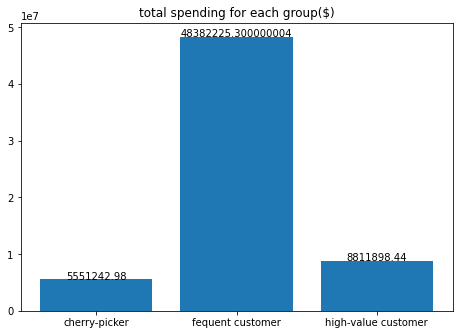

In [407]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

heights = merged1.groupby(['cluster'])['sales_amt'].agg('sum')
customer = ["cherry-picker","fequent customer","high-value customer"]
ax.bar(customer,height = heights)
addlabels(customer,heights)

plt.title("total spending for each group($)")
plt.show()

### Question5.
Other than product categories and sub-categories, are there other product groupings, e.g., Key Value Items (KVI) and Key Value Categories (KVC), traffic drivers, always promoted versus seldom/never promoted, etc.? 

In [309]:
print(f"No. of Category: {len(merged['prod_category'].unique())}", "\n")
print(f"No. of Subcategory: {len(merged['prod_subcategory'].unique())}")

No. of Category: 85 

No. of Subcategory: 371


In [310]:
merged.groupby('prod_category').prod_id.\
apply(lambda x: len(list(np.unique(x)))).sort_values(ascending = False)

prod_category
Natural Foods              6756
Kitchen Prep               4728
Reading                    3265
Colour Cosmetics - Mass    3218
Snacks                     3137
                           ... 
Restaurant Disposable         5
Portraits                     4
Supplies                      1
Spirits                       1
Cosmetic Treatments           1
Name: prod_id, Length: 85, dtype: int64

In [311]:
# how many customers belong to the product categories
merged.groupby('prod_category').cust_id.\
apply(lambda x: len(list(np.unique(x)))).sort_values(ascending = False)

prod_category
Vegetables               746944
Fruit                    585762
Snacks                   424019
Household                352048
Natural Foods            334527
                          ...  
Spirits                      14
Restaurant Disposable         7
Portraits                     4
Supplies                      1
Cosmetic Treatments           1
Name: cust_id, Length: 85, dtype: int64

In [312]:
# how frequent are the product categories
merged.groupby('prod_category').trans_id.\
count().sort_values(ascending=False)

prod_category
Vegetables               1543276
Fruit                    1050135
Snacks                    640044
Natural Foods             595391
Household                 450080
                          ...   
Spirits                       14
Restaurant Disposable          7
Portraits                      4
Supplies                       1
Cosmetic Treatments            1
Name: trans_id, Length: 85, dtype: int64

In [314]:
 merged.groupby('prod_category').sales_amt.agg('sum').sort_values(ascending= False)

prod_category
Vegetables               5732445.09
Fruit                    4394924.19
Natural Foods            3984398.00
Snacks                   2412444.14
HMR                      2152635.24
                            ...    
Spirits                      154.82
Cosmetic Treatments           89.97
Portraits                     36.33
Restaurant Disposable         33.12
Supplies                       6.99
Name: sales_amt, Length: 85, dtype: float64

In [315]:
prod_cat_df = merged.groupby('prod_category').prod_id.\
apply(lambda x: len(list(np.unique(x)))).sort_values(ascending = False).\
to_frame()

In [316]:
prod_cat_df.shape[0]

85

In [317]:
prod_cat_df['cust_count'] = merged.groupby('prod_category').cust_id.\
apply(lambda x: len(list(np.unique(x)))).sort_values(ascending = False)

prod_cat_df['trx_count'] = merged.groupby('prod_category').trans_id.\
count().sort_values(ascending=False)

prod_cat_df['sales_total'] = merged.groupby('prod_category').sales_amt.\
agg('sum').sort_values(ascending= False)

prod_cat_df

,prod_id,cust_count,trx_count,sales_total
prod_category,,,,
Natural Foods,6756,334527,595391,3984398.00
Kitchen Prep,4728,42966,45082,501085.70
Reading,3265,14416,17031,122929.24
Colour Cosmetics - Mass,3218,7313,7574,67935.16
Snacks,3137,424019,640044,2412444.14
...,...,...,...,...
Restaurant Disposable,5,7,7,33.12
Portraits,4,4,4,36.33
Supplies,1,1,1,6.99


In [318]:
prod_cat_df.sort_values('cust_count', ascending = False)

,prod_id,cust_count,trx_count,sales_total
prod_category,,,,
Vegetables,1147,746944,1543276,5732445.09
Fruit,551,585762,1050135,4394924.19
Snacks,3137,424019,640044,2412444.14
Household,1132,352048,450080,242890.01
Natural Foods,6756,334527,595391,3984398.00
...,...,...,...,...
Spirits,1,14,14,154.82
Restaurant Disposable,5,7,7,33.12
Portraits,4,4,4,36.33


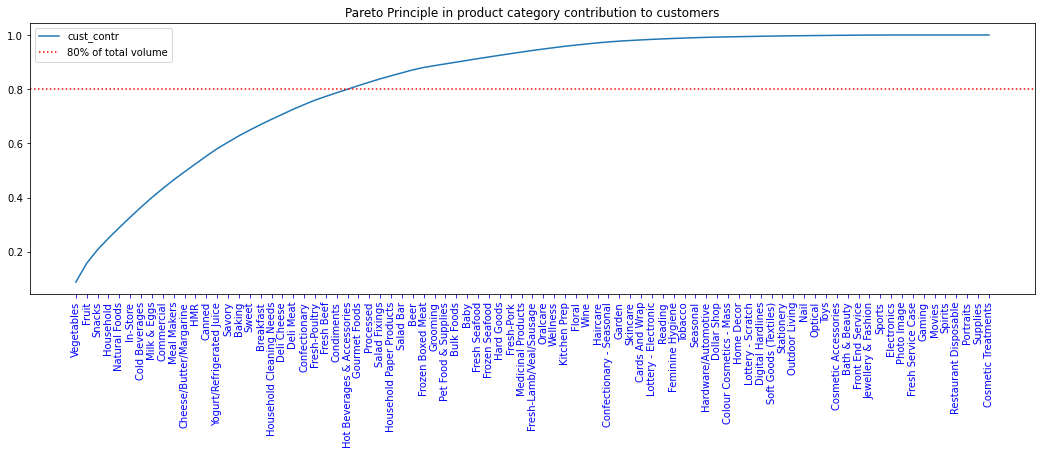

In [353]:
# cumulative sum of sales to find the contribution of categories to sales

prod_cat_df = prod_cat_df.sort_values('cust_count', ascending = False)
prod_cat_df['cust_contr'] = prod_cat_df['cust_count'].cumsum()\
/ prod_cat_df['cust_count'].sum()

plt.figure(figsize = (18,5))
plt.plot(prod_cat_df['cust_contr'], label = 'cust_contr')
plt.axhline(y = 0.8, color = 'r', linestyle = ':', label = '80% of total volume')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Pareto Principle in product category contribution to customers')
plt.show()


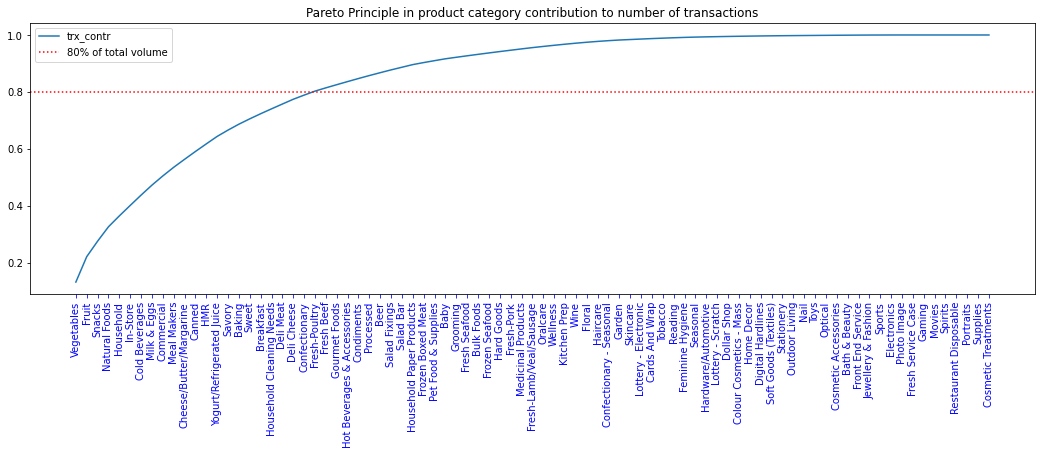

In [354]:
prod_cat_df = prod_cat_df.sort_values('trx_count', ascending = False)
prod_cat_df['trx_contr'] = prod_cat_df['trx_count'].cumsum()\
/ prod_cat_df['trx_count'].sum()

plt.figure(figsize = (18,5))
plt.plot(prod_cat_df['trx_contr'], label = 'trx_contr')
plt.axhline(y = 0.8, color = 'r', linestyle = ':', label = '80% of total volume')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Pareto Principle in product category contribution to number of transactions')
plt.show()

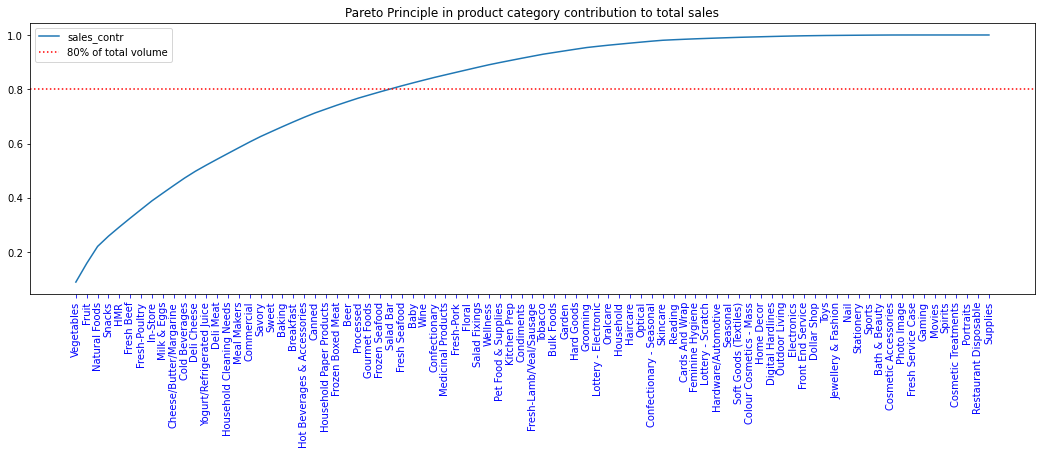

In [355]:
prod_cat_df = prod_cat_df.sort_values('sales_total', ascending = False)
prod_cat_df['sales_contr'] = prod_cat_df['sales_total'].cumsum()\
/ prod_cat_df['sales_total'].sum()

plt.figure(figsize = (18,5))
plt.plot(prod_cat_df['sales_contr'], label = 'sales_contr')
plt.axhline(y = 0.8, color = 'r', linestyle = ':', label = '80% of total volume')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Pareto Principle in product category contribution to total sales')
plt.show()

In [322]:
# since the prod categories have multiple values, 
# we could normalize the numbers with the number of product items in each category
norm_prod_cat_df = prod_cat_df[['prod_id']].copy()

norm_prod_cat_df['cust_per_pid'] = prod_cat_df['cust_count']/prod_cat_df['prod_id'].\
sort_values(ascending = True)

norm_prod_cat_df['trx_per_pid'] = prod_cat_df['trx_count']/prod_cat_df['prod_id'].\
sort_values(ascending = True)

norm_prod_cat_df['sales_per_pid'] = prod_cat_df['sales_total']/prod_cat_df['prod_id'].\
sort_values(ascending = True)

norm_prod_cat_df

,prod_id,cust_per_pid,trx_per_pid,sales_per_pid
prod_category,,,,
Natural Foods,6756,49.515542,88.127738,589.756957
Kitchen Prep,4728,9.087563,9.535110,105.982593
Reading,3265,4.415314,5.216233,37.650609
Colour Cosmetics - Mass,3218,2.272530,2.353636,21.110988
Snacks,3137,135.167039,204.030602,769.029053
...,...,...,...,...
Restaurant Disposable,5,1.400000,1.400000,6.624000
Portraits,4,1.000000,1.000000,9.082500
Supplies,1,1.000000,1.000000,6.990000


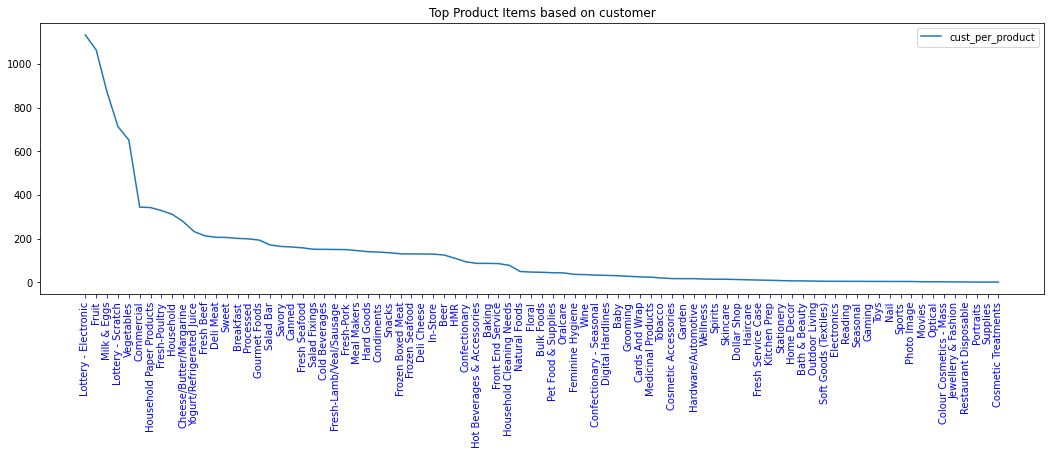

In [323]:
plt.figure(figsize = (18,5))
norm_prod_cat_df=norm_prod_cat_df.sort_values('cust_per_pid', ascending = False)
plt.plot(norm_prod_cat_df['cust_per_pid'], label = 'cust_per_product')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Top Product Items based on customer')
plt.show()

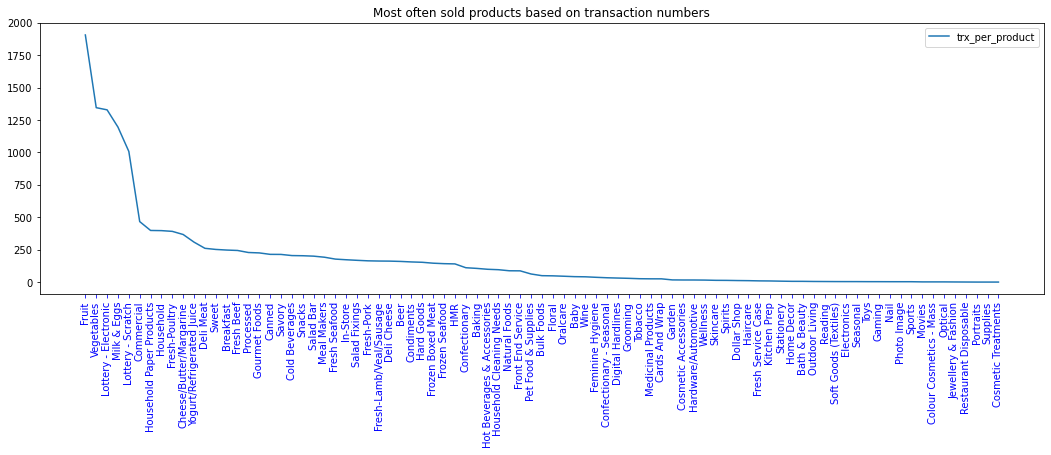

In [324]:
plt.figure(figsize = (18,5))
norm_prod_cat_df=norm_prod_cat_df.sort_values('trx_per_pid', ascending = False)
plt.plot(norm_prod_cat_df['trx_per_pid'], label = 'trx_per_product')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Most often sold products based on transaction numbers')
plt.show()

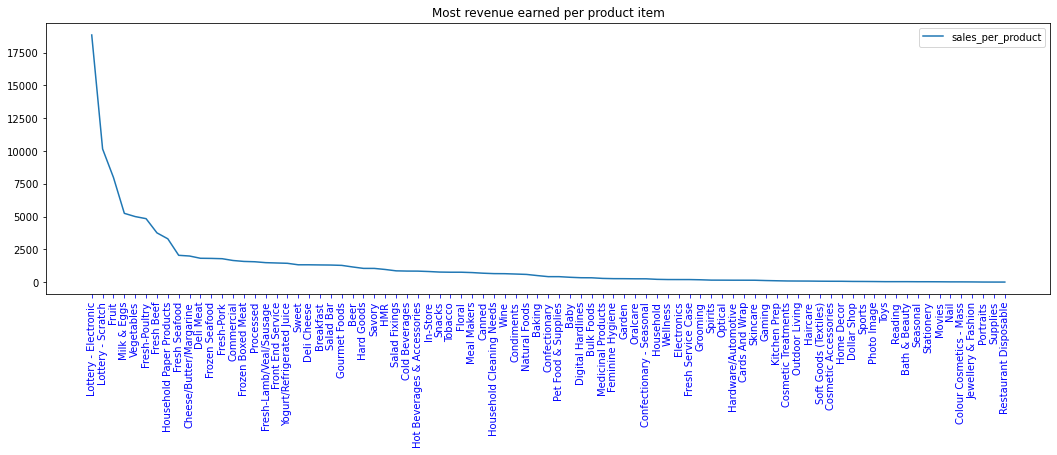

In [325]:
plt.figure(figsize = (18,5))
norm_prod_cat_df=norm_prod_cat_df.sort_values('sales_per_pid', ascending = False)
plt.plot(norm_prod_cat_df['sales_per_pid'], label = 'sales_per_product')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.tick_params(axis = 'x', colors = 'blue')
plt.title('Most revenue earned per product item')
plt.show()

In [326]:
prod_id_df = merged.groupby('prod_id').trans_id.\
count().sort_values(ascending=False).\
to_frame()

prod_id_df['cust_count'] = merged.groupby('prod_id').cust_id.\
apply(lambda x: len(list(np.unique(x)))).sort_values(ascending = False)

prod_id_df['sales_total'] = merged.groupby('prod_id').sales_amt.\
agg('sum').sort_values(ascending= False)

prod_id_df.head()

,trans_id,cust_count,sales_total
prod_id,,,
20189092,414875,327090,39602.10
20175355001,188493,155564,274230.00
20070132001,58794,53763,134275.16
20812144001,47993,43655,139313.06
21097012001,42393,38726,170288.68


In [327]:
prod_id_df.index=prod_id_df.index.astype(str)

In [337]:
merged = merged.dropna()
merged.head()

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,...,unit_price,max_price,discount_rate,frequency,recency,monetary,avg_discount,day,month,year
0,170625010050404567,2017-06-25,1005,1008061498,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,...,2.49,4.99,50.1,10,98.200000,2.490,44.439231,25,6,2017
1,170624010190805778,2017-06-24,1019,1100611737,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,...,2.49,4.99,50.1,1,982.000000,2.490,50.100000,24,6,2017
2,170624010010806725,2017-06-24,1001,1016601259,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,...,2.49,4.99,50.1,2,491.000000,2.490,29.225000,24,6,2017
3,170624010270807847,2017-06-24,1027,1021650510,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,...,2.49,4.99,50.1,2,491.000000,1.995,56.963333,24,6,2017
4,170625010040707767,2017-06-25,1004,1128987709,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,Natural Foods,...,2.49,4.99,50.1,18,54.555556,3.740,30.850500,25,6,2017


In [338]:
merged['trans_dt'] = pd.to_datetime(merged['trans_dt'])
merged['day']= (merged['trans_dt']).dt.day
merged['month']= (merged['trans_dt']).dt.month
merged['year']= (merged['trans_dt']).dt.year
merged.dtypes

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/2435446264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['trans_dt'] = pd.to_datetime(merged['trans_dt'])
C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/2435446264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['day']= (merged['trans_dt']).dt.day
C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/2435446264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

trans_id                        int64
trans_dt               datetime64[ns]
store_id                        int64
cust_id                         int64
prod_id                         int64
sales_amt                     float64
sales_qty                       int64
sales_wgt                     float64
prod_desc                      object
prod_section                   object
prod_category                  object
prod_subcategory               object
prod_type                      object
prod_mfc_brand_cd              object
prod_unit_qty_count           float64
prod_count_uom                 object
prod_uom_value                float64
unit_price                    float64
max_price                     float64
discount_rate                 float64
frequency                       int64
recency                       float64
monetary                      float64
avg_discount                  float64
day                             int64
month                           int64
year        

In [339]:
X = merged.loc[:,['store_id','cust_id','prod_id','sales_amt','sales_qty',\
'frequency','recency','monetary','avg_discount','day','month','year']]
X.head()

,store_id,cust_id,prod_id,sales_amt,sales_qty,frequency,recency,monetary,avg_discount,day,month,year
0,1005,1008061498,21031312,2.49,1,10,98.200000,2.490,44.439231,25,6,2017
1,1019,1100611737,21031312,2.49,1,1,982.000000,2.490,50.100000,24,6,2017
2,1001,1016601259,21031312,2.49,1,2,491.000000,2.490,29.225000,24,6,2017
3,1027,1021650510,21031312,2.49,1,2,491.000000,1.995,56.963333,24,6,2017
4,1004,1128987709,21031312,2.49,1,18,54.555556,3.740,30.850500,25,6,2017


In [340]:
#build kmeans model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X.values)
features = scaler.transform(X.values)

Text(0, 0.5, 'Inertia')

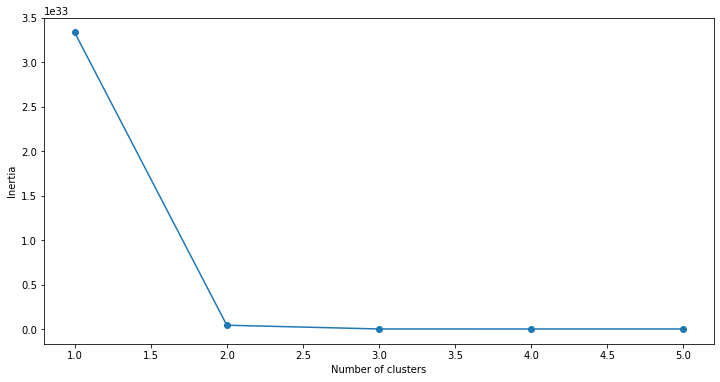

In [341]:
SSE = []

for cluster in range(1,6):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,6), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [342]:
qfive_cluster = KMeans(2).fit_predict(X)

qfive_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [343]:
mergedpostkm = merged.copy()
mergedpostkm.insert(0, "Cluster", qfive_cluster, True)
mergedpostkm.head()

,Cluster,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,...,unit_price,max_price,discount_rate,frequency,recency,monetary,avg_discount,day,month,year
0,0,170625010050404567,2017-06-25,1005,1008061498,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,...,2.49,4.99,50.1,10,98.200000,2.490,44.439231,25,6,2017
1,0,170624010190805778,2017-06-24,1019,1100611737,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,...,2.49,4.99,50.1,1,982.000000,2.490,50.100000,24,6,2017
2,0,170624010010806725,2017-06-24,1001,1016601259,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,...,2.49,4.99,50.1,2,491.000000,2.490,29.225000,24,6,2017
3,0,170624010270807847,2017-06-24,1027,1021650510,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,...,2.49,4.99,50.1,2,491.000000,1.995,56.963333,24,6,2017
4,0,170625010040707767,2017-06-25,1004,1128987709,21031312,2.49,1,0.0,QP TORTILLA CHIPS RED CORN,...,2.49,4.99,50.1,18,54.555556,3.740,30.850500,25,6,2017


In [348]:
clustertable=pd.DataFrame()
clustertable[['total_sales','Total_qty']] = mergedpostkm.groupby(['Cluster'])\
['sales_amt','sales_qty'].agg('sum')

clustertable[['store_count','cust_count','prod_id_count','prod_section_count'\
              ,'prod_category_count','prod_subcategory_count','prod_type_count']] = \
mergedpostkm.groupby(['Cluster'])\
['store_id','cust_id','prod_id','prod_section','prod_category','prod_subcategory','prod_type']\
.nunique()

clustertable[['avg_price_item','avg_qty_item','avg_discount']] = mergedpostkm.groupby(['Cluster'])\
['sales_amt','sales_qty','avg_discount']\
    .agg('mean')

clustertable

C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/4209040525.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clustertable[['total_sales','Total_qty']] = mergedpostkm.groupby(['Cluster'])\
C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/4209040525.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergedpostkm.groupby(['Cluster'])\
C:\Users\sendt\AppData\Local\Temp/ipykernel_10848/4209040525.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clustertable[['avg_price_item','avg_qty_item','avg_discount']] = mergedpostkm.groupby(['Cluster'])\


,total_sales,Total_qty,store_count,cust_count,prod_id_count,prod_section_count,prod_category_count,prod_subcategory_count,prod_type_count,avg_price_item,avg_qty_item,avg_discount
Cluster,,,,,,,,,,,,
0,57296808.34,13435316,58,2048993,91060,27,84,370,1877,5.423656,1.271773,33.132084
1,5448558.38,1275230,58,467477,52696,27,84,365,1759,5.404731,1.264972,34.521953


In [364]:
clusteritems=pd.DataFrame()
mergedpostkm.groupby(['Cluster','prod_category'])['sales_amt'].describe()

count       mean        std   min  \
Cluster prod_category                                                     
0       Baby                        71449.0   8.650610  33.001056  0.15   
        Baking                     226169.0   4.695041   3.310515  0.04   
        Bath & Beauty                2658.0   5.766881   3.837864  0.22   
        Beer                       104205.0   7.223133   5.943823  1.19   
        Breakfast                  193337.0   5.295391   4.310358  0.24   
...                                     ...        ...        ...   ...   
1       Toys                          307.0  10.040684  10.150448  0.10   
        Vegetables                 121724.0   3.650451   2.287993  0.02   
        Wellness                     4552.0  12.641852  10.334323  0.20   
        Wine                         3275.0  15.467255  10.417840  2.08   
        Yogurt/Refrigerated Juice   24756.0   4.617860   2.409523  0.00   

                                     25%    50%    75%      max  
Cluster prod_category                                            
0       Baby                        1.99   3.49   7.00  4956.39  
        Baking                      2.59   3.99   5.98   129.87  
        Bath & Beauty               2.94   4.99   7.99    49.96  
        Beer                        2.79   5.32  10.80   161.28  
        Breakfast                   3.49   4.99   5.99  1397.20  
...                                  ...    ...    ...      ...  
1       Toys                        3.38   6.99  12.98    79.97  
        Vegetables                  1.99   2.99   4.99    83.86  
        Wellness                    6.49  10.49  15.49   122.99  
        Wine                       10.62  13.05  16.59   192.72  
        Yogurt/Refrigerated Juice   3.00   3.99   5.68    63.84  

[168 rows x 8 columns]

### Question 6
Are there natural groupings of stores, e.g., stores frequented by cherry-pickers versus stores visited by most loyal customers?

In [408]:
merged1['store_id'].nunique()

58

In [409]:
store_grouping = merged1.groupby(['cluster','store_id'])['trans_id'].agg("nunique").reset_index()

In [410]:
store_grouping.columns = ['cluster', 'store_id', 'number_of_transactions']
store_grouping.columns 

Index(['cluster', 'store_id', 'number_of_transactions'], dtype='object')

In [411]:
store_grouping=store_grouping.sort_values(["cluster", "number_of_transactions"], ascending = False)

In [412]:
store_grouping.loc[store_grouping['cluster']==0].head(5)

,cluster,store_id,number_of_transactions
5,0,1007,48679
21,0,1050,38693
47,0,1212,35832
0,0,1000,33797
15,0,1027,33203


In [413]:
store_grouping.loc[store_grouping['cluster']==1].head(5)

,cluster,store_id,number_of_transactions
104,1,1212,342395
78,1,1050,305377
62,1,1007,295453
60,1,1004,290561
69,1,1021,271575


In [414]:
store_grouping.loc[store_grouping['cluster']==2].head(5)

,cluster,store_id,number_of_transactions
120,2,1007,71774
162,2,1212,58159
136,2,1050,57035
130,2,1027,52781
121,2,1010,50750


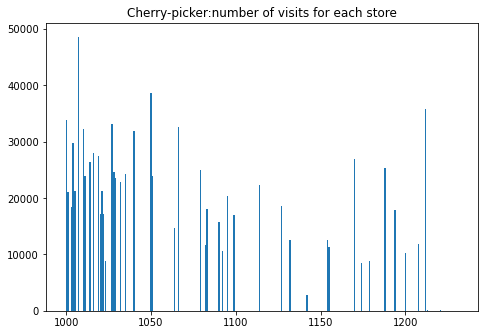

In [415]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

figure1 = store_grouping.loc[store_grouping['cluster']==0]
x=figure1.store_id
heights = figure1.number_of_transactions

ax.bar(x,height = heights)


plt.title("Cherry-picker:number of visits for each store")
plt.show()

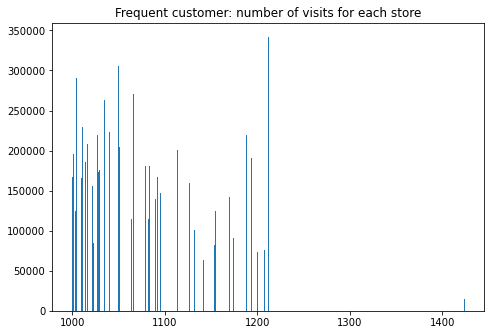

In [416]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

figure2 = store_grouping.loc[store_grouping['cluster']==1]
x=figure2.store_id
heights = figure2.number_of_transactions

ax.bar(x,height = heights)


plt.title("Frequent customer: number of visits for each store")
plt.show()

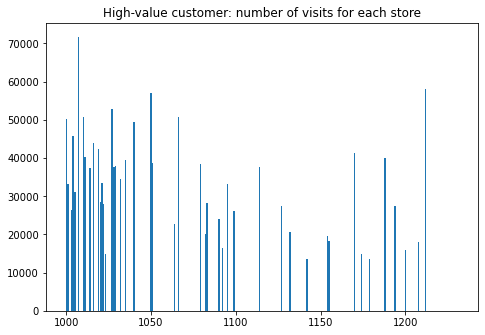

In [417]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

figure3 = store_grouping.loc[store_grouping['cluster']==2]
x=figure3.store_id
heights = figure3.number_of_transactions

ax.bar(x,height = heights)


plt.title("High-value customer: number of visits for each store")
plt.show()